In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [7]:
folders


['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [8]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
from tensorflow.keras.layers import MaxPooling2D

In [12]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [16]:
training_set

In [17]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\DELL\AppData\Local\Temp/ipykernel_1444/4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
13/13 [==============================] - 25s 2s/step - loss: 2.1640 - accuracy: 0.4952 - val_loss: 0.6482 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 19s 1s/step - loss: 0.6487 - accuracy: 0.5769 - val_loss: 0.6860 - val_accuracy: 0.6343
Epoch 3/50
13/13 [==============================] - 19s 1s/step - loss: 0.5882 - accuracy: 0.6394 - val_loss: 0.7904 - val_accuracy: 0.3806
Epoch 4/50
13/13 [==============================] - 21s 2s/step - loss: 0.5567 - accuracy: 0.6803 - val_loss: 0.8446 - val_accuracy: 0.3806
Epoch 5/50
13/13 [==============================] - 19s 1s/step - loss: 0.4936 - accuracy: 0.7332 - val_loss: 0.7547 - val_accuracy: 0.4552
Epoch 6/50
13/13 [==============================] - 17s 1s/step - loss: 0.4511 - accuracy: 0.7740 - val_loss: 0.8512 - val_accuracy: 0.4328
Epoch 7/50
13/13 [==============================] - 17s 1s/step - loss: 0.4181 - accuracy: 0.8101 - val_loss: 0.6570 - val_accuracy: 0.5746
Epoch 8/50
13/13 [==

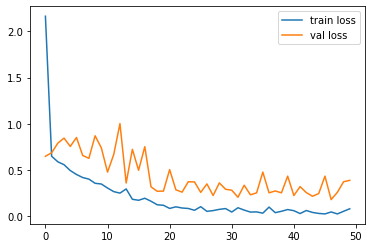

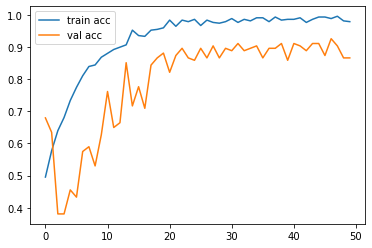

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [24]:
y_pred = model.predict(test_set)

5/5 [==============================] - 1s 164ms/step


In [25]:
y_pred

array([[9.87860382e-01, 1.21395970e-02],
       [3.45125329e-03, 9.96548831e-01],
       [1.00000000e+00, 4.81385669e-08],
       [2.37245247e-01, 7.62754738e-01],
       [9.99961615e-01, 3.83256265e-05],
       [3.30461897e-02, 9.66953874e-01],
       [1.00000000e+00, 2.26111824e-10],
       [1.00000000e+00, 1.46720136e-10],
       [1.02299295e-01, 8.97700667e-01],
       [8.79317056e-03, 9.91206825e-01],
       [9.99999046e-01, 1.00908369e-06],
       [9.97620165e-01, 2.37985305e-03],
       [3.32713500e-03, 9.96672869e-01],
       [1.66050106e-01, 8.33949924e-01],
       [9.99898672e-01, 1.01286474e-04],
       [9.99491215e-01, 5.08717960e-04],
       [1.69612188e-02, 9.83038783e-01],
       [9.99266446e-01, 7.33547378e-04],
       [9.99999404e-01, 6.04268735e-07],
       [9.70350564e-01, 2.96494309e-02],
       [2.64193807e-02, 9.73580599e-01],
       [2.25756794e-01, 7.74243236e-01],
       [9.99879122e-01, 1.20808276e-04],
       [9.99997377e-01, 2.56593694e-06],
       [9.999651